In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

import seaborn as sns

from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

%matplotlib inline

Datasource: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

In [2]:
wine = pd.read_csv("../data/wine.csv", header=None)
wine.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
85,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
58,1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
27,1,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285
100,2,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710
152,3,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425
145,3,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
139,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590


In [56]:
names = """Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,
Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,
Color intensity,Hue,OD280/OD315 of diluted wines,Proline""".replace("\n", "").split(",")

In [57]:
wine.columns = names

In [58]:
wine.sample(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
97,2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428
26,1,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
139,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
112,2,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
51,1,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265
90,2,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480
16,1,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
35,1,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
65,2,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678


In [6]:
X = wine.iloc[:, 1:]
y = wine["Class"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

In [64]:
forest = RandomForestClassifier(max_depth=5, random_state=100)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9555555555555556

In [66]:
pd.DataFrame({"importance": forest.feature_importances_, 
              "feature": X.columns}).sort_values("importance")

,feature,importance
7,Nonflavanoid phenols,0.002862
8,Proanthocyanins,0.005427
1,Malic acid,0.014360
2,Ash,0.016817
10,Hue,0.021313
3,Alcalinity of ash,0.023794
4,Magnesium,0.036325
5,Total phenols,0.049627
0,Alcohol,0.143822
9,Color intensity,0.158550


In [71]:
SelectKBest(forest, 4)

SelectKBest(k=4,
      score_func=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False))

In [67]:
tree = DecisionTreeClassifier(max_depth=5, random_state=100)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.97777777777777775

In [68]:
pd.DataFrame({"importance": tree.feature_importances_,
              "feature": X.columns}).sort_values("importance")

,feature,importance
1,Malic acid,0.000000
2,Ash,0.000000
4,Magnesium,0.000000
5,Total phenols,0.000000
7,Nonflavanoid phenols,0.000000
0,Alcohol,0.016248
10,Hue,0.019481
8,Proanthocyanins,0.022222
9,Color intensity,0.027273
3,Alcalinity of ash,0.061790


In [21]:
X_train.shape

(133, 13)

In [32]:
ss = StandardScaler()

In [49]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(ss.fit_transform(X_train))
X_test_pca = pca.transform(ss.transform(X_test))
X_pca = np.vstack([X_train_pca, X_test_pca])
y1 = np.concatenate([y_train, y_test])
X_train_pca.shape, X_test_pca.shape

((133, 2), (45, 2))

In [9]:
pca.explained_variance_ratio_

array([ 0.9983405 ,  0.00150251])

In [23]:
forest.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [24]:
forest.score(pca.transform(X_test), y_test)

0.66666666666666663

In [55]:
tree.fit(X_train_pca, y_train)
tree.score(X_test_pca, y_test)

NameError: name 'tree' is not defined

In [48]:
#X_pca = np.vstack([X_train_pca, pca.transform(X_test)])
#y1 = np.concatenate([y_train, y_test])
#plot_decision_regions(X_pca, y1, tree)

NameError: name 'tree' is not defined

KeyboardInterrupt: 

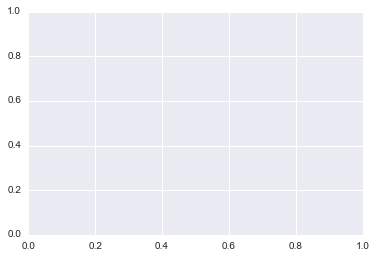

In [19]:
#plot_decision_regions(X_train_pca, y_train, tree)

In [34]:
lr = LogisticRegression(random_state=100)
lr.fit(X_train_pca, y_train)
lr.score(pca.transform(X_test), y_test)

0.37777777777777777

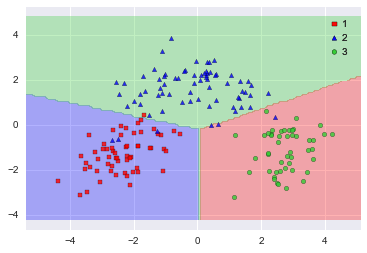

In [54]:
plot_decision_regions(X_pca, y1, lr, res=0.1)

Training accuracy:  0.954887218045 Test Accuracy 0.888888888889


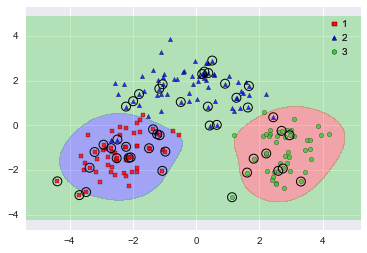

In [53]:
from sklearn.svm import SVC

svc = SVC(C=0.1, gamma=1, kernel="rbf", max_iter=10000, random_state=100, tol=1e-4)
svc.fit(X_train_pca, y_train)
plot_decision_regions(X_pca, y1, svc, X_highlight=X_test_pca)
print("Training accuracy: ", svc.score(X_train_pca, y_train),
      "Test Accuracy", svc.score(X_test_pca, y_test))

Training accuracy:  0.977443609023 Test Accuracy 0.955555555556


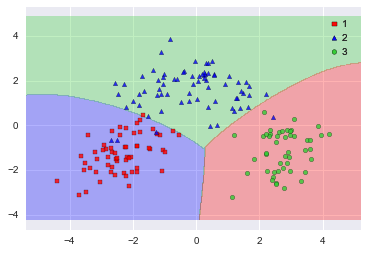

In [50]:
svc = SVC(C=0.1, gamma=0.1, kernel="rbf", max_iter=10000, random_state=100, tol=1e-4)
svc.fit(X_train_pca, y_train)
plot_decision_regions(X_pca, y1, svc)
print("Training accuracy: ", svc.score(X_train_pca, y_train),
      "Test Accuracy", svc.score(X_test_pca, y_test))